## Inspect Top Activations

In [3]:
import json
import warnings
warnings.filterwarnings("ignore")

# block_name = ['ista', 'attn', 'attn2']
# model_dict = {'ista': ['crate-1L', 'crate-2L', 'crate-3L', 'crate-6L', 'gpt-1L', 'gpt-2L', 'gpt-3L', 'gpt-6L'],
#               'attn': ['crate-6L', 'gpt-6L'],
#               'attn2': ['crate-6L', 'gpt-6L']}
# layer_dict = {'ista': [['0'], ['0', '1'], ['0', '1', '2'], ['0', '1', '2', '3', '4', '5'], ['0'], ['0', '1'], ['0', '1', '2'], ['0', '1', '2', '3', '4', '5']],
#               'attn': [['0', '1', '2', '3', '4', '5'], ['0', '1', '2', '3', '4', '5']],
#               'attn2': [['0', '1', '2', '3', '4', '5'], ['0', '1', '2', '3', '4', '5']]}

# block_name = ['ista']
# model_dict = {'ista': ['crate-1L', 'crate-2L', 'crate-3L', 'crate-6L', 'crate-12L', 'crate-12L-half', 'crate-12L-tenth', 'gpt-1L', 'gpt-2L', 'gpt-3L', 'gpt-3L', 'gpt-6L', 'gpt-12L', 'gpt-1L_sae_16x', 'gpt-2L_sae_16x', 'gpt-3L_sae_16x']}
# layer_dict = {'ista': [['0'], ['0', '1'], ['0', '1', '2'], ['0', '1', '2', '3', '4', '5'], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], ['0'], ['0', '1'], ['0', '1', '2'], ['0', '1', '2', '3', '4', '5'], ['0', '1', '2', '3', '4', '5'], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], ['0'], ['0', '1'], ['0', '1', '2']]}

block_name = ['ista_anthropic']
model_dict = {'ista_anthropic': ['crate-1L', 'crate-2L', 'crate-3L', 'crate-6L', 'crate-12L_600000', 'crate-1L_sae_16x', 'crate-2L_sae_16x', 'crate-3L_sae_16x', 'gpt-1L', 'gpt-2L', 'gpt-3L', 'gpt-6L', 'gpt-12L_300000', 'gpt-1L_sae_16x', 'gpt-2L_sae_16x', 'gpt-3L_sae_16x']}
layer_dict = {'ista_anthropic': [['0'], ['0', '1'], ['0', '1', '2'], ['0', '1', '2', '3', '4', '5'], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], ['0'], ['0', '1'], ['0', '1', '2'], ['0'], ['0', '1'], ['0', '1', '2'], ['0', '1', '2', '3', '4', '5'], ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], ['0'], ['0', '1'], ['0', '1', '2']]}

index_method = "anthropic_ooc"
# index_method = "random"
# index_method = "top_and_rand"
EXPLANATION_MODEL = "mistral-7b"
SIMULATOR_MODEL = "llama-2-7b"

path_list = []
filename = f'results_80000samples_{EXPLANATION_MODEL}_{SIMULATOR_MODEL}_{index_method}.json'

for block in block_name:
    for model in model_dict[block]:
        for layer in layer_dict[block][model_dict[block].index(model)]:
            # print(model, layer)
            path_list.append(f'{block}/{model}/{layer}/{filename}')

results_dict = {"blocks": [], "models": [], "layers": [], "results": []}
for path in path_list:
    results_dict["blocks"].append(path.split("/")[0])
    results_dict["models"].append(path.split("/")[1])
    results_dict["layers"].append(path.split("/")[2])
    print(path)
    results_dict["results"].append(json.load(open(path, "r")))

ista_anthropic/crate-1L/0/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-2L/0/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-2L/1/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-3L/0/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-3L/1/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-3L/2/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-6L/0/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-6L/1/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-6L/2/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-6L/3/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-6L/4/results_80000samples_mistral-7b_llama-2-7b_anthropic_ooc.json
ista_anthropic/crate-6L/5/result

In [4]:
# make a table of the average_scores. Each row is a model, each column is a layer, leave the blank if the model doesn't have that layer
# ignore the saes
import pandas as pd

# new model name is concat of block and model
results_dict["models"] = [f"{block}_{model}" for block, model in zip(results_dict["blocks"], results_dict["models"])]

average_scores = []
score_stds = []
progress = []
for model, layer, result in zip(results_dict["models"], results_dict["layers"], results_dict["results"]):
    print(model, layer, len(result['scores']))
    total = 0
    if ("6L" in model) or ("12L" in model):
        total = 3072
    else:
        total = 512
    if "sae" in model:
        total *= 16
    progress.append(len(result['scores']) / total)
    # only sum up those numbers that are not nan
    scores_not_nan = [score for score in result['scores'] if not pd.isna(score)]
    average_scores.append(sum(scores_not_nan) / len(scores_not_nan))
    # calculate standard deviation
    score_stds.append(pd.Series(scores_not_nan).std())
    
def remove_repeats(input_list):
    seen = set()
    result = []
    for item in input_list:
        if item not in seen:
            seen.add(item)
            result.append(item)
    return result
    
print("Progress")
df = pd.DataFrame(columns=['0', '1', '2', '3', '4', '5'], index=remove_repeats(results_dict["models"]))
for model, layer, prog in zip(results_dict["models"], results_dict["layers"], progress):
    df.at[model, layer] = round(prog*100, 1)
df

ista_anthropic_crate-1L 0 512
ista_anthropic_crate-2L 0 512
ista_anthropic_crate-2L 1 512
ista_anthropic_crate-3L 0 512
ista_anthropic_crate-3L 1 512
ista_anthropic_crate-3L 2 512
ista_anthropic_crate-6L 0 3072
ista_anthropic_crate-6L 1 3072
ista_anthropic_crate-6L 2 3072
ista_anthropic_crate-6L 3 3072
ista_anthropic_crate-6L 4 3072
ista_anthropic_crate-6L 5 3072
ista_anthropic_crate-12L_600000 0 3072
ista_anthropic_crate-12L_600000 1 3072
ista_anthropic_crate-12L_600000 2 3072
ista_anthropic_crate-12L_600000 3 3072
ista_anthropic_crate-12L_600000 4 3072
ista_anthropic_crate-12L_600000 5 3072
ista_anthropic_crate-12L_600000 6 3072
ista_anthropic_crate-12L_600000 7 3072
ista_anthropic_crate-12L_600000 8 3072
ista_anthropic_crate-12L_600000 9 3072
ista_anthropic_crate-12L_600000 10 3072
ista_anthropic_crate-12L_600000 11 3072
ista_anthropic_crate-1L_sae_16x 0 8192
ista_anthropic_crate-2L_sae_16x 0 8192
ista_anthropic_crate-2L_sae_16x 1 8192
ista_anthropic_crate-3L_sae_16x 0 8192
ista_ant

,0,1,2,3,4,5,6,7,8,9,10,11
ista_anthropic_crate-1L,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_crate-2L,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_crate-3L,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_crate-6L,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_crate-12L_600000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
ista_anthropic_crate-1L_sae_16x,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_crate-2L_sae_16x,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_crate-3L_sae_16x,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_gpt-1L,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ista_anthropic_gpt-2L,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Average Scores")
df = pd.DataFrame(columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'avg'], index=remove_repeats(results_dict["models"]))
for model, layer, score in zip(results_dict["models"], results_dict["layers"], average_scores):
    df.at[model, layer] = round(score*100, 1)
    df.at[model, 'avg'] = round(sum([score for score in df.loc[model].values if not pd.isna(score)])/len([score for score in df.loc[model].values if not pd.isna(score)]), 1)
df

Average Scores


,0,1,2,3,4,5,6,7,8,9,10,11,avg
ista_anthropic_crate-1L,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1
ista_anthropic_crate-2L,11.3,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3
ista_anthropic_crate-3L,12.6,10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.4
ista_anthropic_crate-6L,13.1,10.5,9.7,9.2,9.5,3.3,NaN,NaN,NaN,NaN,NaN,NaN,9.4
ista_anthropic_crate-12L_600000,20.2,11.1,10.1,8.2,5.8,9.2,6.4,4.6,3.5,8.1,10.5,0.6,8.2
ista_anthropic_crate-1L_sae_16x,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9
ista_anthropic_crate-2L_sae_16x,21.7,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6
ista_anthropic_crate-3L_sae_16x,19.3,18.4,11.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.1
ista_anthropic_gpt-1L,14.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2
ista_anthropic_gpt-2L,9.7,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0


In [7]:
(10.1+11.3+11.4+12.6+10.0+11.1) - (17.9+21.7+12.4+19.3+18.4+11.6)
(14.2+9.7+10.7+14.8+4.1+8.7) - (15.4+23.5+10.7+25.5+15.1+10.1)

-38.099999999999994

In [22]:
# print all scores from 1L to 3L models, concat by ", ", like 10.5, 20.3, 30.1
scores_1Lto3L_crate = []
stds_1Lto3L_crate = []
scores_1Lto3L_gpt = []
stds_1Lto3L_gpt = []
scores_1Lto3L_gpt_sae = []
stds_1Lto3L_gpt_sae = []
import re
for model, layer, score, std in zip(results_dict["models"], results_dict["layers"], average_scores, score_stds):
    # print(model)
    # include 1L, 2L, 3L, exclude 12L
    if re.search(r"1L|2L|3L", model) and "12L" not in model:
        if "crate" in model:
            scores_1Lto3L_crate.append(str(round(score*100, 1)))
            stds_1Lto3L_crate.append(str(round(std*10, 1)))
        elif "sae" in model:
            scores_1Lto3L_gpt_sae.append(str(round(score*100, 1)))
            stds_1Lto3L_gpt_sae.append(str(round(std*10, 1)))
        elif "gpt" in model:
            scores_1Lto3L_gpt.append(str(round(score*100, 1)))
            stds_1Lto3L_gpt.append(str(round(std*10, 1)))
print("=== Average Scores ===")
print("--- crate-123L ---")
print(", ".join(scores_1Lto3L_crate))
print("--- gpt-123L ---")
print(", ".join(scores_1Lto3L_gpt))
print("--- gpt-123L_sae ---")
print(", ".join(scores_1Lto3L_gpt_sae))

print("=== Standard Deviations ===")
print("--- crate-123L ---")
print(", ".join(stds_1Lto3L_crate))
print("--- gpt-123L ---")
print(", ".join(stds_1Lto3L_gpt))
print("--- gpt-123L_sae ---")
print(", ".join(stds_1Lto3L_gpt_sae))

=== Average Scores ===
--- crate-123L ---
3.9, 7.8, 8.3, 9.6, 9.3, 8.4
--- gpt-123L ---
8.8, 4.3, 4.1, 7.3, 0.8, 2.6, 7.3, 0.8, 2.6
--- gpt-123L_sae ---
5.5, 7.6, 3.5, 9.4, 4.9, 3.5
=== Standard Deviations ===
--- crate-123L ---
1.9, 2.2, 1.9, 2.2, 2.5, 1.9
--- gpt-123L ---
2.1, 1.9, 1.8, 1.6, 1.9, 1.9, 1.6, 1.9, 1.9
--- gpt-123L_sae ---
1.5, 1.3, 1.6, 1.3, 1.3, 1.5


In [23]:
# print all scores of the 6L models, concat by " & ", like 10.5 & 7.4 & 5.8 & ...
scores_6L_crate = []
stds_6L_crate = []
scores_6L_gpt = []
stds_6L_gpt = []
for model, layer, score, std in zip(results_dict["models"], results_dict["layers"], average_scores, score_stds):
    if "crate-6L" in model:
        scores_6L_crate.append(str(round(score*100, 1)))
        stds_6L_crate.append(str(round(std*10, 1)))
    elif "gpt-6L" in model:
        scores_6L_gpt.append(str(round(score*100, 1)))
        stds_6L_gpt.append(str(round(std*10, 1)))
print("=== Average Scores ===")
print("--- crate-6L ---")
print(" & ".join(scores_6L_crate))
print(", ".join(scores_6L_crate))
print("--- gpt-6L ---")
print(" & ".join(scores_6L_gpt))
print(", ".join(scores_6L_gpt))

print("=== Standard Deviations ===")
print("--- crate-6L ---")
print(" & ".join(stds_6L_crate))
print(", ".join(stds_6L_crate))
print("--- gpt-6L ---")
print(" & ".join(stds_6L_gpt))
print(", ".join(stds_6L_gpt))

=== Average Scores ===
--- crate-6L ---
10.5 & 7.4 & 5.8 & 8.0 & 8.1 & 5.7
10.5, 7.4, 5.8, 8.0, 8.1, 5.7
--- gpt-6L ---
13.7 & 5.2 & 1.9 & 0.6 & 5.6 & 6.9
13.7, 5.2, 1.9, 0.6, 5.6, 6.9
=== Standard Deviations ===
--- crate-6L ---
1.6 & 1.7 & 1.7 & 1.7 & 1.7 & 1.7
1.6, 1.7, 1.7, 1.7, 1.7, 1.7
--- gpt-6L ---
1.4 & 1.3 & 1.5 & 1.5 & 1.3 & 1.5
1.4, 1.3, 1.5, 1.5, 1.3, 1.5


In [24]:
# print all scores of the 6L models, concat by " & ", like 10.5 & 7.4 & 5.8 & ...
scores_12L_crate = []
stds_12L_crate = []
scores_12L_gpt = []
stds_12L_gpt = []
for model, layer, score, std in zip(results_dict["models"], results_dict["layers"], average_scores, score_stds):
    if "crate-12L" in model:
        scores_12L_crate.append(str(round(score*100, 1)))
        stds_12L_crate.append(str(round(std*10, 1)))
    elif "gpt-12L" in model:
        scores_12L_gpt.append(str(round(score*100, 1)))
        stds_12L_gpt.append(str(round(std*10, 1)))
print("=== Average Scores ===")
print("--- CRATE-12L ---")
print(" & ".join(scores_12L_crate))
print(", ".join(scores_12L_crate))
print("--- GPT-12L ---")
print(" & ".join(scores_12L_gpt))
print(", ".join(scores_12L_gpt))

print("=== Standard Deviations ===")
print("--- CRATE-12L ---")
print(" & ".join(stds_12L_crate))
print(", ".join(stds_12L_crate))
print("--- GPT-12L ---")
print(" & ".join(stds_12L_gpt))
print(", ".join(stds_12L_gpt))

=== Average Scores ===
--- CRATE-12L ---
13.6 & 8.2 & 6.7 & 5.4 & 5.0 & 7.2 & 5.1 & 5.1 & 3.6 & 5.5 & 9.4 & 5.3 & 13.9 & 8.3 & 6.5 & 6.0 & 4.3 & 6.7 & 5.1 & 4.6 & 3.7 & 5.2 & 8.0 & 2.8 & 12.9 & 8.6 & 7.4 & 6.5 & 5.6 & 6.4 & 5.4 & 4.2 & 8.4 & 7.2 & 6.9 & 0.7
13.6, 8.2, 6.7, 5.4, 5.0, 7.2, 5.1, 5.1, 3.6, 5.5, 9.4, 5.3, 13.9, 8.3, 6.5, 6.0, 4.3, 6.7, 5.1, 4.6, 3.7, 5.2, 8.0, 2.8, 12.9, 8.6, 7.4, 6.5, 5.6, 6.4, 5.4, 4.2, 8.4, 7.2, 6.9, 0.7
--- GPT-12L ---
15.3 & 8.0 & 6.4 & 4.2 & 3.2 & 4.0 & 4.7 & 3.9 & 3.9 & 7.2 & 8.9 & 8.0
15.3, 8.0, 6.4, 4.2, 3.2, 4.0, 4.7, 3.9, 3.9, 7.2, 8.9, 8.0
=== Standard Deviations ===
--- CRATE-12L ---
1.5 & 1.6 & 1.6 & 1.8 & 1.7 & 1.6 & 1.5 & 1.7 & 1.6 & 1.4 & 1.5 & 1.7 & 1.5 & 1.6 & 1.6 & 1.7 & 1.7 & 1.6 & 1.5 & 1.7 & 1.5 & 1.4 & 1.5 & 1.5 & 1.6 & 1.8 & 1.7 & 1.8 & 1.8 & 1.7 & 1.6 & 1.8 & 1.5 & 1.4 & 1.6 & 1.8
1.5, 1.6, 1.6, 1.8, 1.7, 1.6, 1.5, 1.7, 1.6, 1.4, 1.5, 1.7, 1.5, 1.6, 1.6, 1.7, 1.7, 1.6, 1.5, 1.7, 1.5, 1.4, 1.5, 1.5, 1.6, 1.8, 1.7, 1.8, 1.8, 1.7, 1.6

## Score Distribution

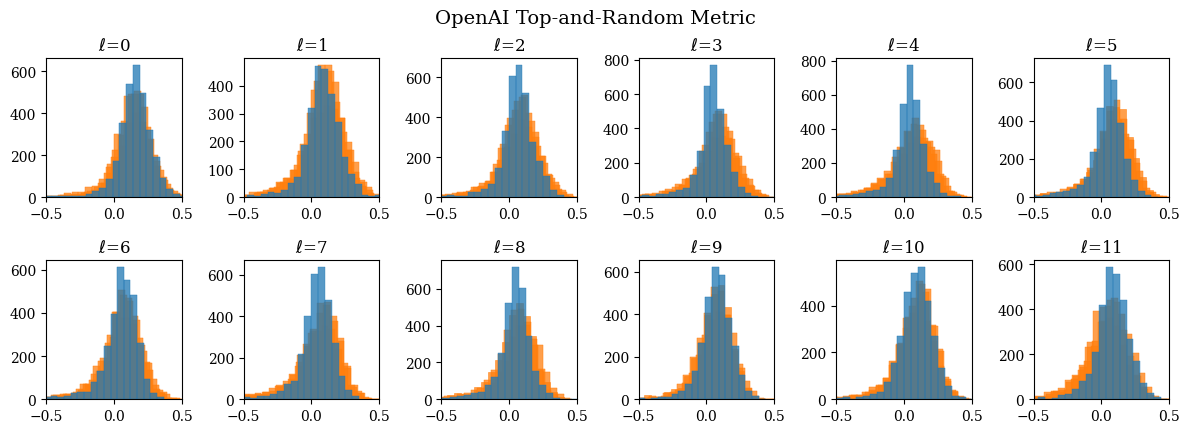

In [25]:
# plot the two distributions of scores in a single plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams["font.family"] = "serif"
# plt.rcParams.update({'figure.autolayout': True})
# sns.set_context("talk")

# Assuming results_dict is predefined
# Organize data by layer
data_by_layer = {}
for model, layer, result in zip(results_dict["models"], results_dict["layers"], results_dict["results"]):
    if "12L" in model and "ista" in model:
        # print(model)
        if layer not in data_by_layer:
            data_by_layer[layer] = []
        data_by_layer[layer].append((model, result))

# Determine the number of unique layers to plot
num_layers = len(data_by_layer)
fig, axes = plt.subplots(2, 6, figsize=(12, 4), squeeze=False)
axes = axes.flatten() # Ensure axes is always 1D, even if num_layers == 1

# for i, (layer, models_results) in enumerate(data_by_layer.items()):
#     ax = axes[i]
#     ax.set_title(f"$\ell$={layer}")
#     for model, result in models_results:
#         # print(model)
#         if "gpt-12L" in model:
#             sns.histplot(result['scores'], ax=ax, color='C0', edgecolor='C0', kde_kws={'bw_adjust': 0.5})
#         elif "crate-12L" in model:
#             sns.histplot(result['scores'], ax=ax, color='C1', edgecolor='C1', kde_kws={'bw_adjust': 0.5})
#     ax.set_ylabel('')
#     ax.set_xlim(-0.5, 0.5)

for i, (layer, models_results) in enumerate(data_by_layer.items()):
    ax = axes[i]
    ax.set_title(f"$\ell$={layer}")
    # Define bin width
    bin_width = 0.05  # Adjust this value as needed to achieve the desired bar width
    # Define common bins if you want precise control over the intervals
    common_bins = np.arange(-0.5, 0.5 + bin_width, bin_width)
    for model, result in models_results:
        # print(model)
        if "gpt-12L" in model:
            sns.histplot(result['scores'], ax=ax, color='C0', edgecolor='C0', binwidth=bin_width, bins=common_bins, kde_kws={'bw_adjust': 0.5})
        elif "crate-12L" in model:
            sns.histplot(result['scores'], ax=ax, color='C1', edgecolor='C1', binwidth=bin_width, bins=common_bins, kde_kws={'bw_adjust': 0.5})
    ax.set_ylabel('')
    ax.set_xlim(-0.5, 0.5)
    
# if 'random' in index_method:
FONTSIZE = 14
if 'random' in index_method:
    fig.legend(['CRATE-GPT-Base', 'GPT-Base'], bbox_to_anchor=(0.5, 1.18), loc='upper center', ncol=2, fontsize=FONTSIZE*3/4)  # Adjust 'ncol' as needed based on the number of labels
# if 'top_and_rand' in index_method:
    # fig.text(0, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize=FONTSIZE)  # Adjust coordinates and text as needed
# if 'anthropic' in index_method:
    # fig.text(0.5, 0, 'Interpretation Score', ha='center', va='center', fontsize=FONTSIZE)  # Adjust coordinates and text as needed
title = {
    "anthropic_ooc": "Anthropic Metric",
    "random": "OpenAI Random-only Metric",
    "top_and_rand": "OpenAI Top-and-Random Metric"
}
fig.text(0.5, 1.05, title[index_method], ha='center', va='center', fontsize=FONTSIZE)  # Adjust coordinates and text as needed

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95) # Adjust top spacing to accommodate the main title
plt.savefig(f"12L_distr_{index_method}.pdf", bbox_inches='tight')

In [26]:
import json
import colorsys
from html import escape
from IPython.display import HTML
from IPython.display import display

def create_html(strings, values, max_value=None, saturation=0.5, allow_different_length=False, return_string=False):
    # escape strings to deal with tabs, newlines, etc.
    SPACE = "·"
    NEWLINE="↩"
    TAB = "→"
    
    escaped_strings = [escape(s, quote=True) for s in strings]
    processed_strings = [
        s.replace("\n", f"{NEWLINE}<br/>").replace("\t", f"{TAB}&emsp;").replace(" ", "&nbsp;")
        for s in escaped_strings
    ]

    if not allow_different_length:
        assert len(processed_strings) == len(values)

    # scale values
    if max_value is None:
        max_value = max(max(values), -min(values))+1e-3
    scaled_values = [v / max_value * saturation for v in values]

    # create html
    html = ""
    for i, s in enumerate(processed_strings):
        if i<len(scaled_values):
            v = scaled_values[i]
        else:
            v = 0
        if v < 0:
            hue = 0  # hue for red in HSV
        else:
            hue = 0.66  # hue for blue in HSV
        rgb_color = colorsys.hsv_to_rgb(
            hue, v, 1
        )  # hsv color with hue 0.66 (blue), saturation as v, value 1
        hex_color = "#%02x%02x%02x" % (
            int(rgb_color[0] * 255),
            int(rgb_color[1] * 255),
            int(rgb_color[2] * 255),
        )
        html += f'<span style="background-color: {hex_color}; color: black; border: 1px solid lightgray; font-size: 16px; border-radius: 3px;">{s}</span>'
    if return_string:
        return html
    else:
        display(HTML(html))


def create_latex(strings, values, max_value=None, saturation=0.5, allow_different_length=False, return_string=False):
    # LaTeX special characters escaping
    def escape_latex(s):
        replacements = {
            # " ": r"·",
            "&": r"\&",
            "%": r"\%",
            "$": r"\$",
            "#": r"\#",
            "_": r"\_",
            "{": r"\{",
            "}": r"\}",
            "~": r"\textasciitilde{}",
            "^": r"\^{}",
            "<": r"\textless{}",
            ">": r"\textgreater{}",
            "\n": r"\textbackslash{}n",
            "\t": r"\textbackslash{}t",
        }
        # Temporarily replace backslashes to avoid double escaping
        s = s.replace("\\", "temporary_backslash_placeholder")
        for old, new in replacements.items():
            s = s.replace(old, new)
        # Now replace the placeholder with the correct LaTeX for a single backslash
        s = s.replace("temporary\_backslash\_placeholder", r"\textbackslash{}")
        return s

    processed_strings = [escape_latex(s) for s in strings]
    # print(escape_latex("\~"))

    if not allow_different_length:
        assert len(processed_strings) == len(values)

    # scale values
    if max_value is None:
        max_value = max(max(values), -min(values)) + 1e-3
    scaled_values = [v / max_value * saturation for v in values]

    # Create LaTeX string with the new command
    tokens_latex = ""
    for i, s in enumerate(processed_strings):
        if i < len(scaled_values):
            v = scaled_values[i]
        else:
            v = 0
        if v < 0:
            hue = 0  # hue for red in HSV
        else:
            hue = 0.66  # hue for blue in HSV
        rgb_color = colorsys.hsv_to_rgb(hue, abs(v), 1)  # Convert HSV to RGB
        hex_color = "%02x%02x%02x" % (
            int(rgb_color[0] * 255),
            int(rgb_color[1] * 255),
            int(rgb_color[2] * 255),
        )
        tokens_latex += r"\ct{" + hex_color + r"}{" + s + r"} "

    # Wrap the entire sentence with fbox
    full_latex = r"\fbox{" + r"\begin{minipage}{\textwidth}" + tokens_latex + "\end{minipage}" + "}"

    if return_string:
        return full_latex
    else:
        print(full_latex)

In [27]:
# get all neurons with score larger than 40
neurons = []
for model, layer, result in zip(results_dict["models"], results_dict["layers"], results_dict["results"]):
    for i, score, explanation in zip(range(len(result['scores'])), result['scores'], result['explanations']):
        if score > -0.2 and score < -0.1 and 'crate' in model:
            neurons.append((model, layer, i, score, explanation))
neurons

[('ista_crate-1L',
  '0',
  13,
  -0.12780657172838442,
  ' This neuron seems to be activated by Arabic language characters and certain phrases such as "What\'s new?" and "Your storage folders are not writable, please apply the good rights!" along with Arabic words related to emotions like "Happy" and "Playful". It appears'),
 ('ista_crate-1L',
  '0',
  15,
  -0.1327135179421663,
  ' blocks of code or markup, specifically opening and closing tags and brackets, in text content.'),
 ('ista_crate-1L',
  '0',
  21,
  -0.17611217848359104,
  ' mathematical equations and variables. It looks for specific mathematical symbols and keywords, such as "begin", "aligned", "label", "quad", "oper", "at", "orn", "ame", "HM", and mathematical symbols like \'+\', \'-\', \'\\*\', \'/\', and \''),
 ('ista_crate-1L',
  '0',
  61,
  -0.1296148917259923,
  ' code snippets, specifically in programming languages like Java or C++, and related keywords.'),
 ('ista_crate-1L',
  '0',
  62,
  -0.15385520065885122,


## Viewer

In [28]:
import json

index_method_list = ["top_and_rand"]
block_name_list = ['ista']
eval_name_list = ['OpenAI']
EXPLANATION_MODEL = "mistral-7b"
SIMULATOR_MODEL = "llama-2-7b"

model = 'crate-2L'
layer = '1'
neuron = 85
samples = [i for i in range(5)]

command = ""
for index_method, block_name, eval_name in zip(index_method_list, block_name_list, eval_name_list):
    filename = f'results_80000samples_{EXPLANATION_MODEL}_{SIMULATOR_MODEL}_{index_method}.json'
    path = f'{block_name}/{model}/{layer}/{neuron}.json'
    acts = json.load(open(path, "r"))

    top_tokens_list = []
    top_activations_list = []
    print("Top Activations")
    for sample in samples:
        dict = acts['most_positive_activation_records'][sample]
        tokens = dict['tokens']
        top_tokens_list.append(tokens)
        activations = dict['activations']
        top_activations_list.append(activations)
        create_html(tokens, activations, return_string=False)

    random_tokens_list = []
    random_activations_list = []
    print("Random Activations")
    for sample in samples[::-1]:
        dict = acts['random_sample'][sample]
        tokens = dict['tokens']
        random_tokens_list.append(tokens)
        activations = dict['activations']
        random_activations_list.append(activations)
        create_html(tokens, activations, return_string=False)

    res_path = f'{block_name}/{model}/{layer}/' + filename
    res = json.load(open(res_path, "r"))
    explanation = res['explanations'][neuron]
    score = res['scores'][neuron]

    prefix = r"\paragraph{" + eval_name + r" Evaluation}" + r" \textbf{Score:} " + str(score) + r"\\\textbf{Explanation:} " + explanation + r"\\ "
    latex_compound = ""
    latex_compound += r"\textbf{Top Activations}\\"
    if eval_name == "OpenAI":
        iters = 2
    else:
        iters = 4
    for i in range(iters):
        tokens = top_tokens_list[i]
        activations = top_activations_list[i]
        latex = create_latex(tokens, activations, return_string=True)
        latex_compound += latex + r"\\ "
    latex_compound += r"\textbf{Random Activations}\\"
    for i in range(iters):
        tokens = random_tokens_list[i]
        activations = random_activations_list[i]
        latex = create_latex(tokens, activations, return_string=True)
        latex_compound += latex + r"\\ "
    command += prefix + latex_compound

print(command)
with open('command.txt', 'w') as f:
    f.write(command)

Top Activations


Random Activations


\paragraph{OpenAI Evaluation} \textbf{Score:} -0.25065834487608685\\\textbf{Explanation:}  phrases containing specific names, dates, and organizations, especially in the context of events or people's backgrounds.\\ \textbf{Top Activations}\\\fbox{\begin{minipage}{\textwidth}\ct{ffffff}{ state} \ct{ffffff}{'s} \ct{ffffff}{ east} \ct{ffffff}{ coast} \ct{e2e3ff}{,} \ct{f9f9ff}{ from} \ct{ffffff}{ Fort} \ct{ffffff}{ Pierce} \ct{ffffff}{ to} \ct{ffffff}{ Flag} \ct{ffffff}{ler} \ct{ffffff}{ Beach} \ct{ffffff}{.} \ct{c7c9ff}{\textbackslash{}n} \ct{fafaff}{Photo} \ct{dfe0ff}{:} \ct{ffffff}{ Associated} \ct{ffffff}{ Press} \ct{ffffff}{/} \ct{ffffff}{Alan} \ct{ffffff}{ Diaz} \ct{b7b9ff}{\textbackslash{}n} \ct{bbbeff}{\textbackslash{}n} \ct{e6e7ff}{By} \ct{f3f3ff}{ Col} \ct{ffffff}{leen} \ct{ffffff}{ Jenkins} \ct{ccceff}{ and} \ct{ffffff}{ Gene} \ct{ffffff}{ Cherry} \ct{babdff}{\textbackslash{}n} \ct{bfc1ff}{\textbackslash{}n} \ct{8085ff}{(} \ct{eaebff}{Reuters} \ct{ffffff}{)} \ct{d4d6ff}{ –} \ct